In [1]:
# import libraries

import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [2]:
# 1. read input data
df =  pd.read_csv('train.csv')
df.head(2)

C:\Users\avina\AppData\Local\Temp\ipykernel_6428\2320557470.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df =  pd.read_csv('train.csv')


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147


In [3]:
# 2. dataset decription
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       903653 non-null  object
 1   date                  903653 non-null  int64 
 2   device                903653 non-null  object
 3   fullVisitorId         903653 non-null  object
 4   geoNetwork            903653 non-null  object
 5   sessionId             903653 non-null  object
 6   socialEngagementType  903653 non-null  object
 7   totals                903653 non-null  object
 8   trafficSource         903653 non-null  object
 9   visitId               903653 non-null  int64 
 10  visitNumber           903653 non-null  int64 
 11  visitStartTime        903653 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 82.7+ MB


In [4]:
# 2. dataset decription (continued)
df.describe()

,date,visitId,visitNumber,visitStartTime
count,9.036530e+05,9.036530e+05,903653.000000,9.036530e+05
mean,2.016589e+07,1.485007e+09,2.264897,1.485007e+09
std,4.697698e+03,9.022124e+06,9.283735,9.022124e+06
min,2.016080e+07,1.470035e+09,1.000000,1.470035e+09
25%,2.016103e+07,1.477561e+09,1.000000,1.477561e+09
50%,2.017011e+07,1.483949e+09,1.000000,1.483949e+09
75%,2.017042e+07,1.492759e+09,1.000000,1.492759e+09
max,2.017080e+07,1.501657e+09,395.000000,1.501657e+09


In [5]:
# 3. Convert visitStartTime to datetime
df['visitStartTime'] = pd.to_datetime(df['visitStartTime'], unit='s')

df.head(1)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,2016-09-02 15:33:05


In [6]:
# 4. Extract week number
df['week'] = df['visitStartTime'].dt.isocalendar().week

In [7]:
# 5. print df
df.head(1)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,week
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,2016-09-02 15:33:05,35


In [8]:
# 6. Convert 'totals' column (JSON-like) into dict
totals_expanded = df['totals'].apply(json.loads).apply(pd.Series)

totals_expanded.head()

,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,1,1,1,1,1,NaN
1,1,1,1,1,1,NaN
2,1,1,1,1,1,NaN
3,1,1,1,1,1,NaN
4,1,1,1,1,NaN,NaN


In [9]:
# 7. Merge expanded totals back with main dataframe
df = pd.concat([df.drop(columns=['totals']), totals_expanded], axis=1)

df.head(2)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,trafficSource,visitId,visitNumber,visitStartTime,week,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,2016-09-02 15:33:05,35,1,1,1,1,1,NaN
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,2016-09-03 05:22:27,35,1,1,1,1,1,NaN


In [10]:
# 8. datatype change and preprocessing

df['pageviews'] = pd.to_numeric(df['pageviews'], errors='coerce').fillna(0)
#df['transactions'] = pd.to_numeric(df['transactions'], errors='coerce').fillna(0)
df['transactionRevenue'] = pd.to_numeric(df['transactionRevenue'], errors='coerce').fillna(0)
df['transactionRevenue'] = df['transactionRevenue'] / 1000000

In [11]:
# 9. Group by channel and week
agg_df = df.groupby(['channelGrouping', 'week']).agg({
    'pageviews': 'sum',
    'transactionRevenue': 'sum'
}).reset_index()


agg_df.head(5)

,channelGrouping,week,pageviews,transactionRevenue
0,(Other),3,7.0,0.0
1,(Other),4,1.0,0.0
2,(Other),9,1.0,0.0
3,(Other),13,4.0,0.0
4,(Other),14,39.0,0.0


In [12]:
# 10. Create proxies for spend, transactions, and ROI
# --------------------------
# Assume CPC (cost per pageview)
cost_per_pageview = 0.5
agg_df['spend'] = agg_df['pageviews'] * cost_per_pageview

# Proxy transactions (assume average order value = 100)
avg_order_value = 100
agg_df['transactions'] = (agg_df['transactionRevenue'] / avg_order_value).round().astype(int)

# ROI = Revenue / Spend
agg_df['ROI'] = agg_df['transactionRevenue'] / agg_df['spend']



In [13]:
# 11. Generate descriptive statistics
desc_stats = agg_df[['pageviews', 'spend', 'transactionRevenue', 'ROI']].describe()
desc_stats.loc[['mean', 'std', 'min', 'max']]


,pageviews,spend,transactionRevenue,ROI
mean,9129.832021,4564.916010,4042.181732,1.478305
std,10184.824788,5092.412394,5611.082744,8.577413
min,1.000000,0.500000,0.000000,0.000000
max,41203.000000,20601.500000,33847.960000,159.029639


In [14]:
# 12. Regression: Spend → ROI
# --------------------------
X = agg_df[['spend']]
y = agg_df['ROI']

reg = LinearRegression()
reg.fit(X, y)

print("✅ Regression Results")
print("Intercept:", reg.intercept_)
print("Coefficient (Spend → ROI):", reg.coef_[0])



from sklearn.metrics import r2_score

y_pred = reg.predict(X)
r2 = r2_score(y, y_pred)
print("R² score:", r2)

✅ Regression Results
Intercept: 1.9559221655595336
Coefficient (Spend → ROI): -0.00010462781120373807
R² score: 0.003858591117337329


In [15]:
# 13. Clustering (channels by performance)
# --------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
agg_df['cluster'] = kmeans.fit_predict(agg_df[['pageviews', 'transactions']])

print("\n✅ Cluster counts:")
print(agg_df['cluster'].value_counts())


✅ Cluster counts:
1    205
0    110
2     66
Name: cluster, dtype: int64


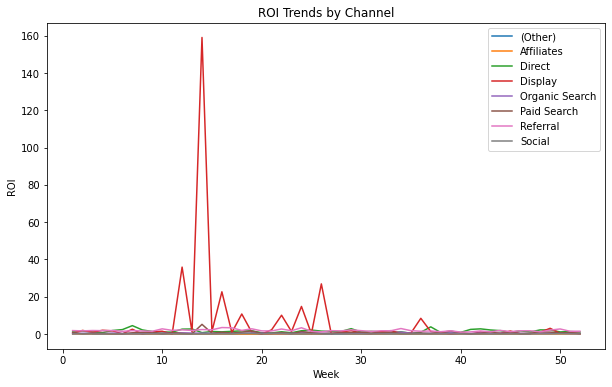

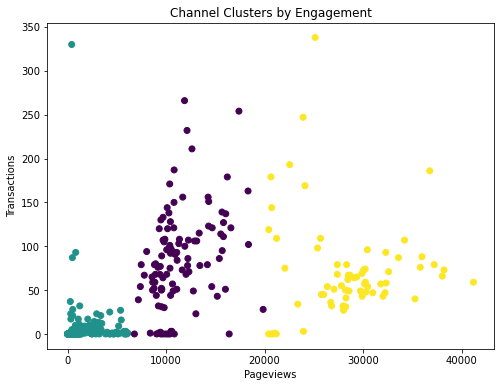

In [16]:
# 14. Basic Plots
# --------------------------

# ROI trends by channel
plt.figure(figsize=(10,6))
for channel in agg_df['channelGrouping'].unique():
    subset = agg_df[agg_df['channelGrouping'] == channel]
    plt.plot(subset['week'], subset['ROI'], label=channel)
plt.xlabel("Week")
plt.ylabel("ROI")
plt.title("ROI Trends by Channel")
plt.legend()
plt.show()

# Clustering scatter plot
plt.figure(figsize=(8,6))
plt.scatter(agg_df['pageviews'], agg_df['transactions'], c=agg_df['cluster'], cmap='viridis')
plt.xlabel("Pageviews")
plt.ylabel("Transactions")
plt.title("Channel Clusters by Engagement")
plt.show()


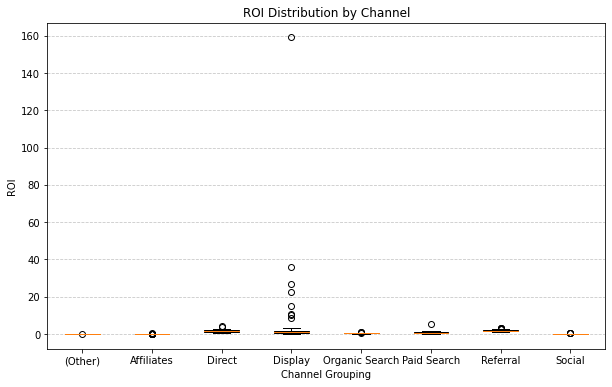

In [17]:
# 15. ROI Distribution by Channel (Box Plot) ---
import matplotlib.pyplot as plt

# Ensure required columns exist
if 'channelGrouping' in agg_df.columns and 'ROI' in agg_df.columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(
        [agg_df[agg_df['channelGrouping'] == ch]['ROI'] for ch in agg_df['channelGrouping'].unique()],
        labels=agg_df['channelGrouping'].unique(),
        patch_artist=True
    )
    plt.title("ROI Distribution by Channel")
    plt.xlabel("Channel Grouping")
    plt.ylabel("ROI")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("❌ Required columns not found in dataframe.")

In [18]:
# 16. Cluster profile summary
cluster_profile = agg_df.groupby('cluster')[['pageviews','transactions','spend','transactionRevenue','ROI']].mean().round(2)

print("✅ Cluster Profiles (mean values per cluster):")
print(cluster_profile)

# Save to CSV (for appendix)
cluster_profile.to_csv("cluster_profiles.csv")


✅ Cluster Profiles (mean values per cluster):
         pageviews  transactions     spend  transactionRevenue   ROI
cluster                                                             
0         11385.27         84.78   5692.64             8480.24  1.48
1          1697.33          6.15    848.67              614.09  1.78
2         28456.56         72.97  14228.28             7293.27  0.53


In [19]:
# 17. Save aggregated dataset
# --------------------------
agg_df.to_csv("aggregated_kaggle_data.csv", index=False)
print("\n✅ Aggregated dataset saved as 'aggregated_kaggle_data.csv'")


✅ Aggregated dataset saved as 'aggregated_kaggle_data.csv'
